In [1]:
import seaborn as sns
import spacy
import nltk
from nltk import bigrams
#from nltk.corpus import stopwords
import pandas as pd
import itertools
import collections
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from textblob import TextBlob


# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim  # don't skip this

In [18]:
tweets = pd.read_pickle("/Users/tomashegewisch/research_project/Tomas/data/May.pkl")
#tweets = tweets.head(1000)

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


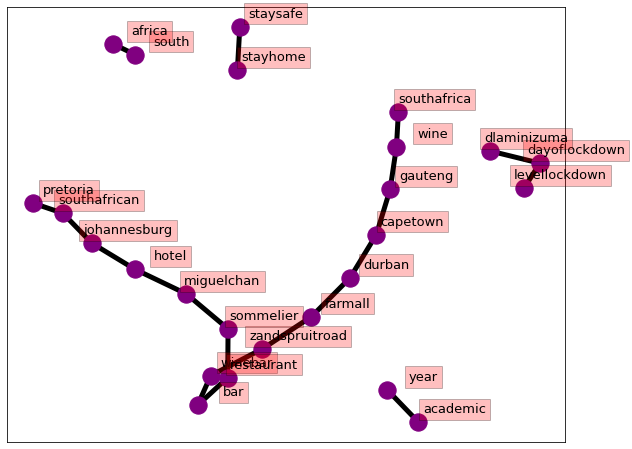

In [3]:
#https://www.earthdatascience.org
#/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/
terms_bigram = [list(bigrams(t)) for t in tweets['tokenised']]
bigram = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigram)
# create a 
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("China", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=7,
                 width=5,
                 edge_color='black',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [4]:
nlp = spacy.load("en_core_web_sm")

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

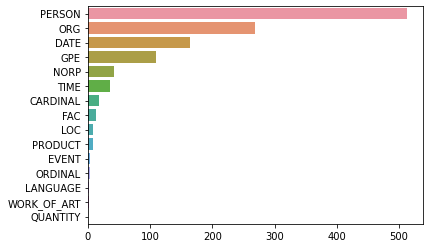

In [5]:
def ner(text):
    temp = ""
    for i in text:
        temp += i +" "
    doc = nlp(temp)
    return [X.label_ for X in doc.ents]

ent = tweets['tokenised'].apply(lambda x : ner(x))
ent = [x for sub in ent for x in sub]
counter = Counter(ent)

count = counter.most_common()
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

In [6]:
word_list = [] 
for i in tweets['tokenised']:
    for j in i:
        word_list.append(j)
word_list = pd.DataFrame(word_list)

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


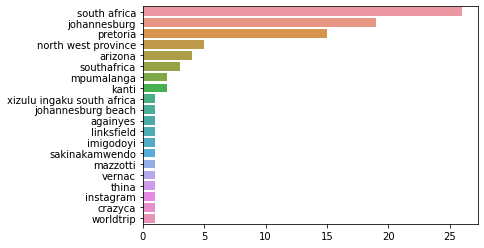

In [7]:
def display(ents):
    def get_ner_per_tweet_tk(text,ent=ents):
        temp = ""
        for i in text:
            temp += i +" "
        doc = nlp(temp)
        return [X.text for X in doc.ents if X.label_ == ent]

    gpe = word_list.apply(lambda x: get_ner_per_tweet_tk(x))
    gpe = [x for x in gpe[0]]
    counter = Counter(gpe)
    x,y = map(list,zip(*counter.most_common(20)))
    sns.barplot(y,x)
    
#display("PERSON") 
display("GPE")
# we will need to fidn a new way to clean as this is not returning a usefull result 

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


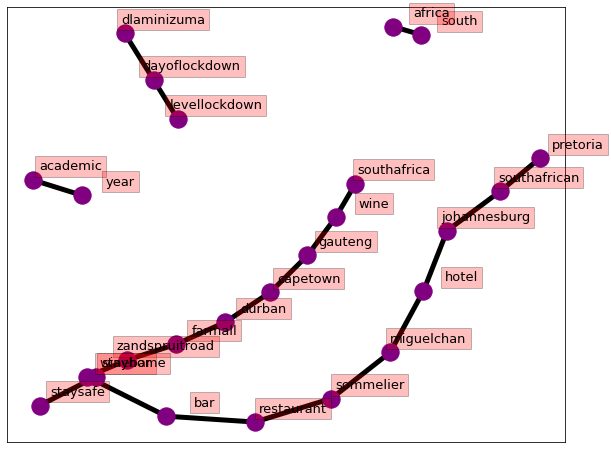

In [8]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=7,
                 width=5,
                 edge_color='black',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

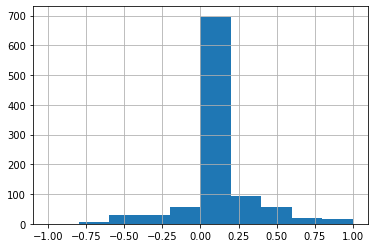

In [9]:
# Sentimnet

def get_sent(text):
    temp = ""
    for i in text:
        temp += i + " "
    return TextBlob(temp).sentiment.polarity

tweet_senti_values = tweets['tokenised'].apply(lambda x : get_sent(x))
tweet_senti_values.hist()

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


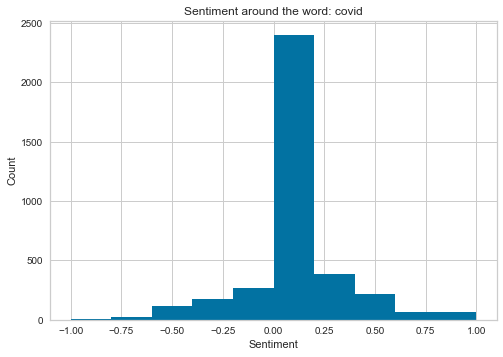

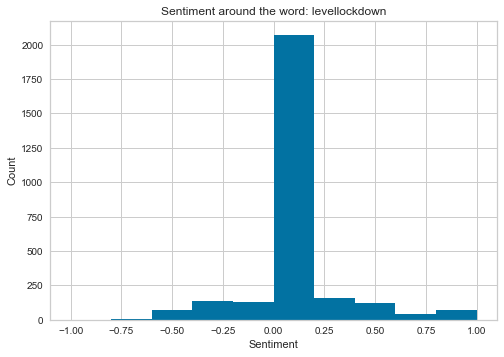

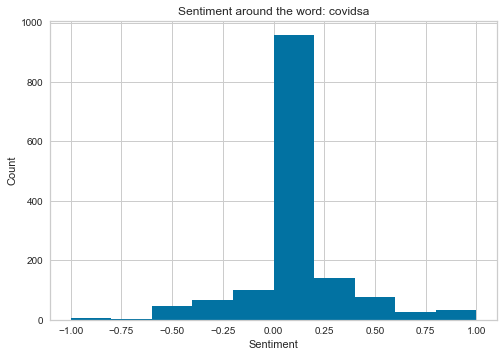

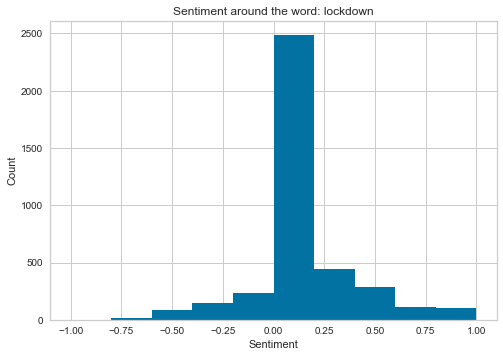

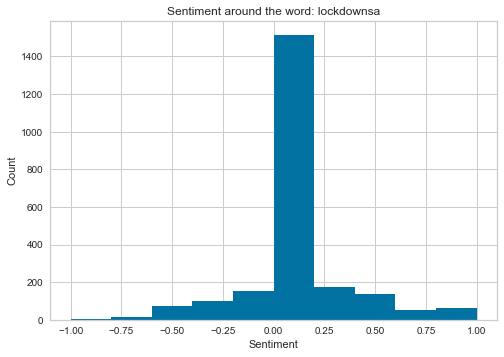

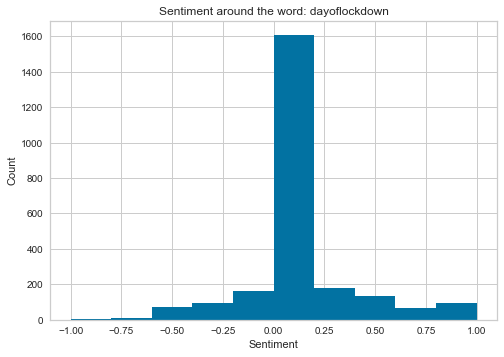

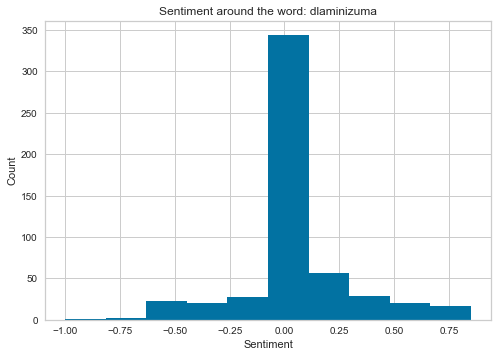

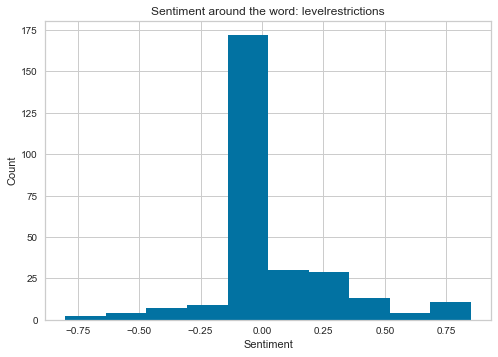

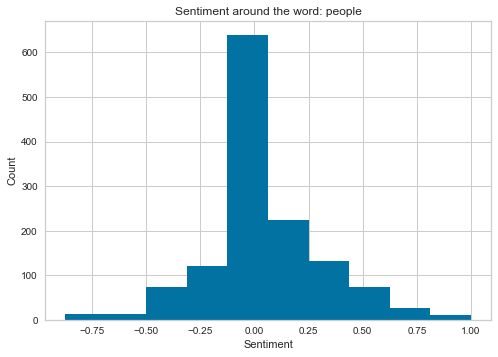

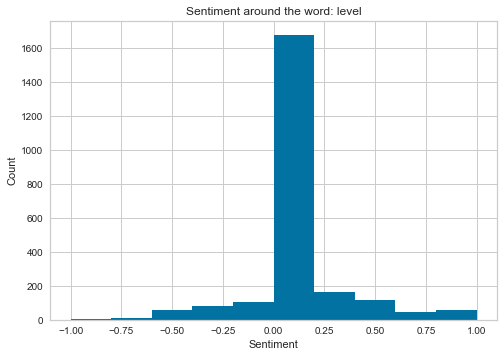

In [29]:
word_list_counter = Counter(word_list[0])
def get_sent_for_top_words(text, lookout_word):
    text_string = ""
    if lookout_word not in text:
        return None
    else:
        for i in text:
            text_string += i + " "
        return TextBlob(text_string).sentiment.polarity

for i in word_list_counter.most_common(10):
    path_name = 'charts/'+i[0]+'.png'
    tweet_senti_values = tweets['tokenised'].apply(lambda x : get_sent_for_top_words(x, i[0]))
    tweet_senti_values = tweet_senti_values.dropna(axis=0, inplace=False, how=None)
    #tweet_senti_values.hist()
    plt.hist(tweet_senti_values)
    plt.title('Sentiment around the word: ' + i[0])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: too many values to unpack (expected 2)

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


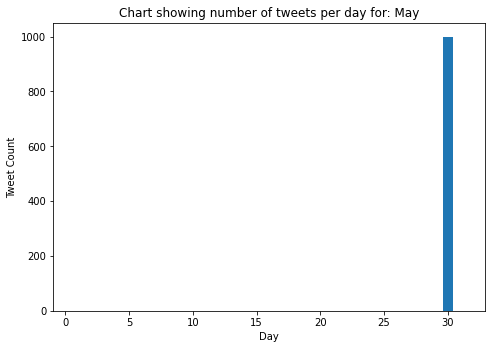

In [11]:
# Time line

# temp = ""
# for i in range(1,32):
#     temp+=str(i) + ":0,"
# temp

date_dict = {1:0,2:0,3:0,4:0,
             5:0,6:0,7:0,8:0,9:0,
             10:0,11:0,12:0,13:0,
             14:0,15:0,16:0,17:0,18:0,
             19:0,20:0,21:0,22:0,23:0,
             24:0,25:0,26:0,27:0,28:0,
             29:0,30:0,31:0}

for i in tweets["date"]:
    value = int(i.to_pydatetime().strftime("%d"))
    date_dict[value] = date_dict[value]+1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(date_dict.keys()),list(date_dict.values()))
ax.set_ylabel('Tweet Count')
ax.set_xlabel('Day')
ax.set_title('Chart showing number of tweets per day for: May')
plt.show()

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


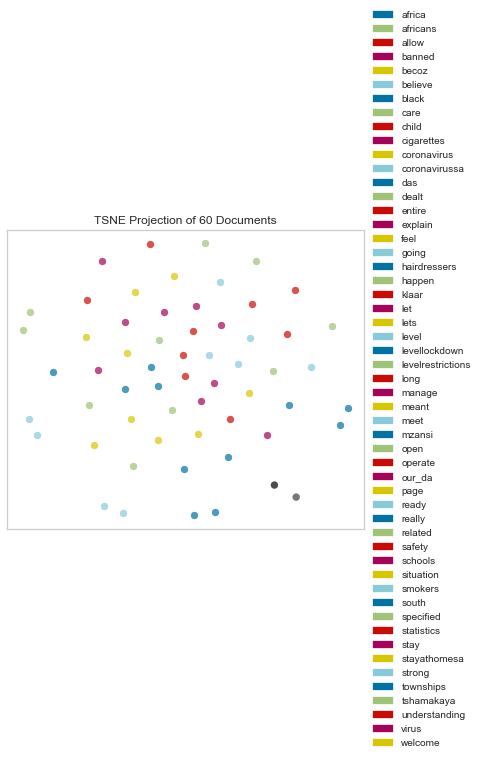

<AxesSubplot:title={'center':'TSNE Projection of 60 Documents'}>

In [12]:
# date_dict
# #tfidf.vocabulary_

# from yellowbrick.text import TSNEVisualizer
# from matplotlib.axes._axes import _log as matplotlib_axes_logger

# matplotlib_axes_logger.setLevel('ERROR')

# corpus = word_list[0][0:60]
# tfidf = TfidfVectorizer()

# X = tfidf.fit_transform(corpus)
# y = corpus

# # Create the visualizer and draw the vectors
# tsne = TSNEVisualizer()
# tsne.fit(X, y)
# tsne.show()

In [13]:
# we have put this on hold.. Not sure what this is good for.
# def dummy_fun(doc):
#     return doc

# tfidf = TfidfVectorizer(
#     analyzer='word',
#     tokenizer=dummy_fun,
#     preprocessor=dummy_fun,
#     token_pattern=None) 

# tfidf.fit([word_list[0]])

# from scipy import stats
# from numpy import array

# data = tfidf

# density = stats.kde.gaussian_kde(data)

# x = np.arange(0, 8, 0.1)

# plt.scatter(x, density(x))

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# dude

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
#TOPIC Modelling

# Create Dictionary
id2word = corpora.Dictionary(tweets['tokenised'])

# Create Corpus
texts = tweets['tokenised']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.413914 -0.140977       1        1  13.162937
0      0.062805  0.066075       2        1  10.023340
15     0.108423  0.360910       3        1   9.540301
2      0.021888  0.009675       4        1   7.534673
18     0.028904  0.015928       5        1   7.157670
13    -0.011896 -0.011712       6        1   5.562533
7     -0.029735 -0.018677       7        1   5.227082
12    -0.020120 -0.015086       8        1   5.151570
3     -0.021914 -0.015876       9        1   4.860127
6     -0.038201 -0.021114      10        1   4.262327
10    -0.022917 -0.016256      11        1   4.216285
19    -0.026058 -0.017413      12        1   4.197212
8     -0.048848 -0.023531      13        1   4.108795
5     -0.045145 -0.022786      14        1   3.220198
17    -0.048687 -0.023508      15        1   3.091395
1     -0.059407 -0.025070      16        1   2.739977
4     -0.059881 -0.025126      17        1   2.115879
14    -0.063607 -0.025393      18        1   1.794554
11    -0.065152 -0.025446      19        1   1.517262
16    -0.074367 -0.024617      20        1   0.515883, topic_info=                    Term          Freq         Total Category  logprob  \
1408  lockdownhouseparty  36272.000000  36272.000000  Default  30.0000   
278                covid  10355.000000  10355.000000  Default  29.0000   
53              lockdown   8558.000000   8558.000000  Default  28.0000   
244       cyrilramaphosa   7217.000000   7217.000000  Default  27.0000   
8                  level   5526.000000   5526.000000  Default  26.0000   
...                  ...           ...           ...      ...      ...   
2199              sunday      0.031833      2.255480  Topic20 -10.9612   
777               coming      0.031833      2.255562  Topic20 -10.9612   
801                 cape      0.031832      2.256015  Topic20 -10.9612   
808                 town      0.031832      2.255616  Topic20 -10.9612   
975                today      0.031832      2.256340  Topic20 -10.9612   

      loglift  
1408  30.0000  
278   29.0000  
53    28.0000  
244   27.0000  
8     26.0000  
...       ...  
2199   1.0064  
777    1.0064  
801    1.0062  
808    1.0063  
975    1.0060  

[888 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
437      15  0.989766      able
690      16  0.992233  actually
453       6  0.971321    adults
37        5  0.999302    africa
38       17  0.994784  africans
...     ...       ...       ...
541       2  0.994892      yall
688       5  0.997935      year
689       5  0.995113     years
421       3  0.995101     youre
155      15  0.945170      zulu

[334 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 16, 3, 19, 14, 8, 13, 4, 7, 11, 20, 9, 6, 18, 2, 5, 15, 12, 17])